In [2]:
import pandas as pd

df=pd.read_csv(r"I:\Awais\AI\ML\ML datasets\Mall_Customers_Dataset\Mall_Customers.csv")
df.drop(columns="CustomerID",inplace=True)
a=df.isnull().sum()
print(a) # Checked that there isn't any null
df.head()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [3]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler

scaler=StandardScaler()
scaled_array=scaler.fit_transform(df[["Age","Annual Income (k$)","Spending Score (1-100)"]])
scaled_df=pd.DataFrame(scaled_array,columns=["Age","Annual Income (k$)","Spending Score (1-100)"])

encoder=OneHotEncoder(sparse_output=False,drop="first")
encoded_array=encoder.fit_transform(df[["Gender"]])
encoded_df=pd.DataFrame(encoded_array,columns=encoder.get_feature_names_out(["Gender"]))

df_new=pd.concat([scaled_df,encoded_df],axis=1)

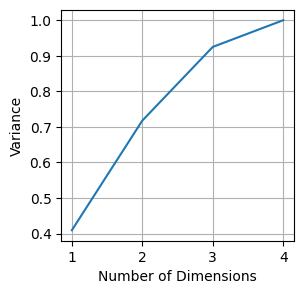

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca=PCA()
pca.fit_transform(df_new)
variance=pca.explained_variance_ratio_
cum=variance.cumsum()
plt.figure(figsize=(3,3))
plt.xlabel("Number of Dimensions")
plt.ylabel("Variance")
plt.grid(True)
plt.plot(range(1,(len(cum))+1),cum)
plt.show()

In [5]:
#EDA's telling us to drop the last component of variance:
pca_final=PCA(n_components=3)
final_data=pca_final.fit_transform(df_new)

Text(0.5, 0.98, 'Gaussian Mixture')

<Figure size 200x1000 with 0 Axes>

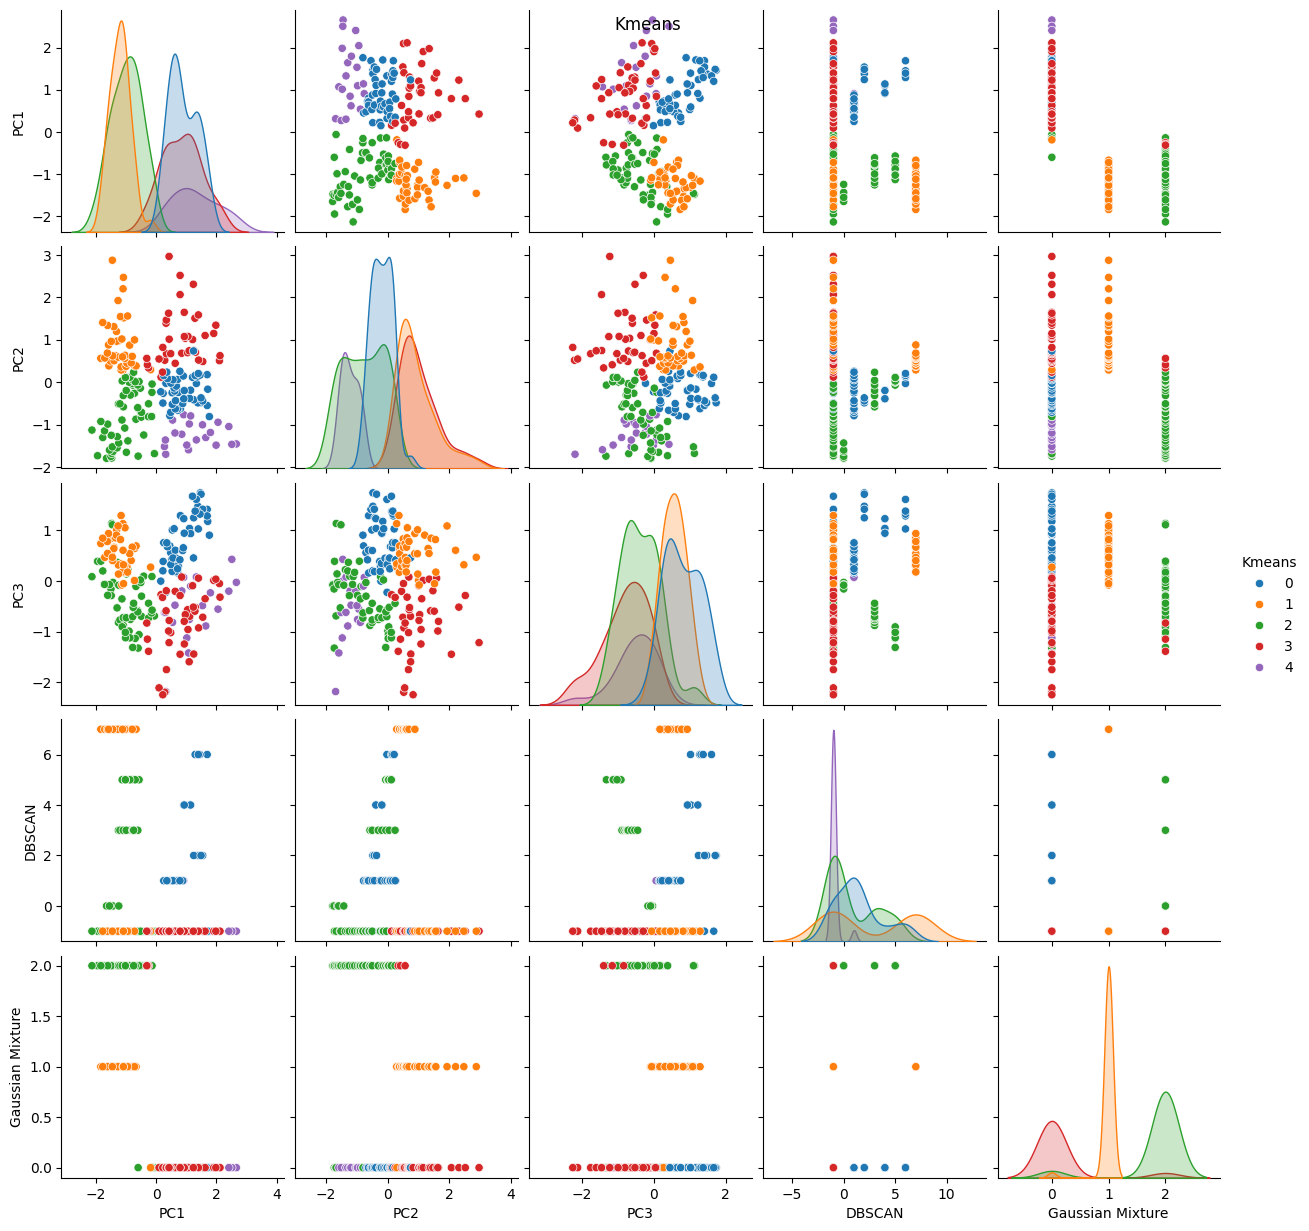

<Figure size 200x1000 with 0 Axes>

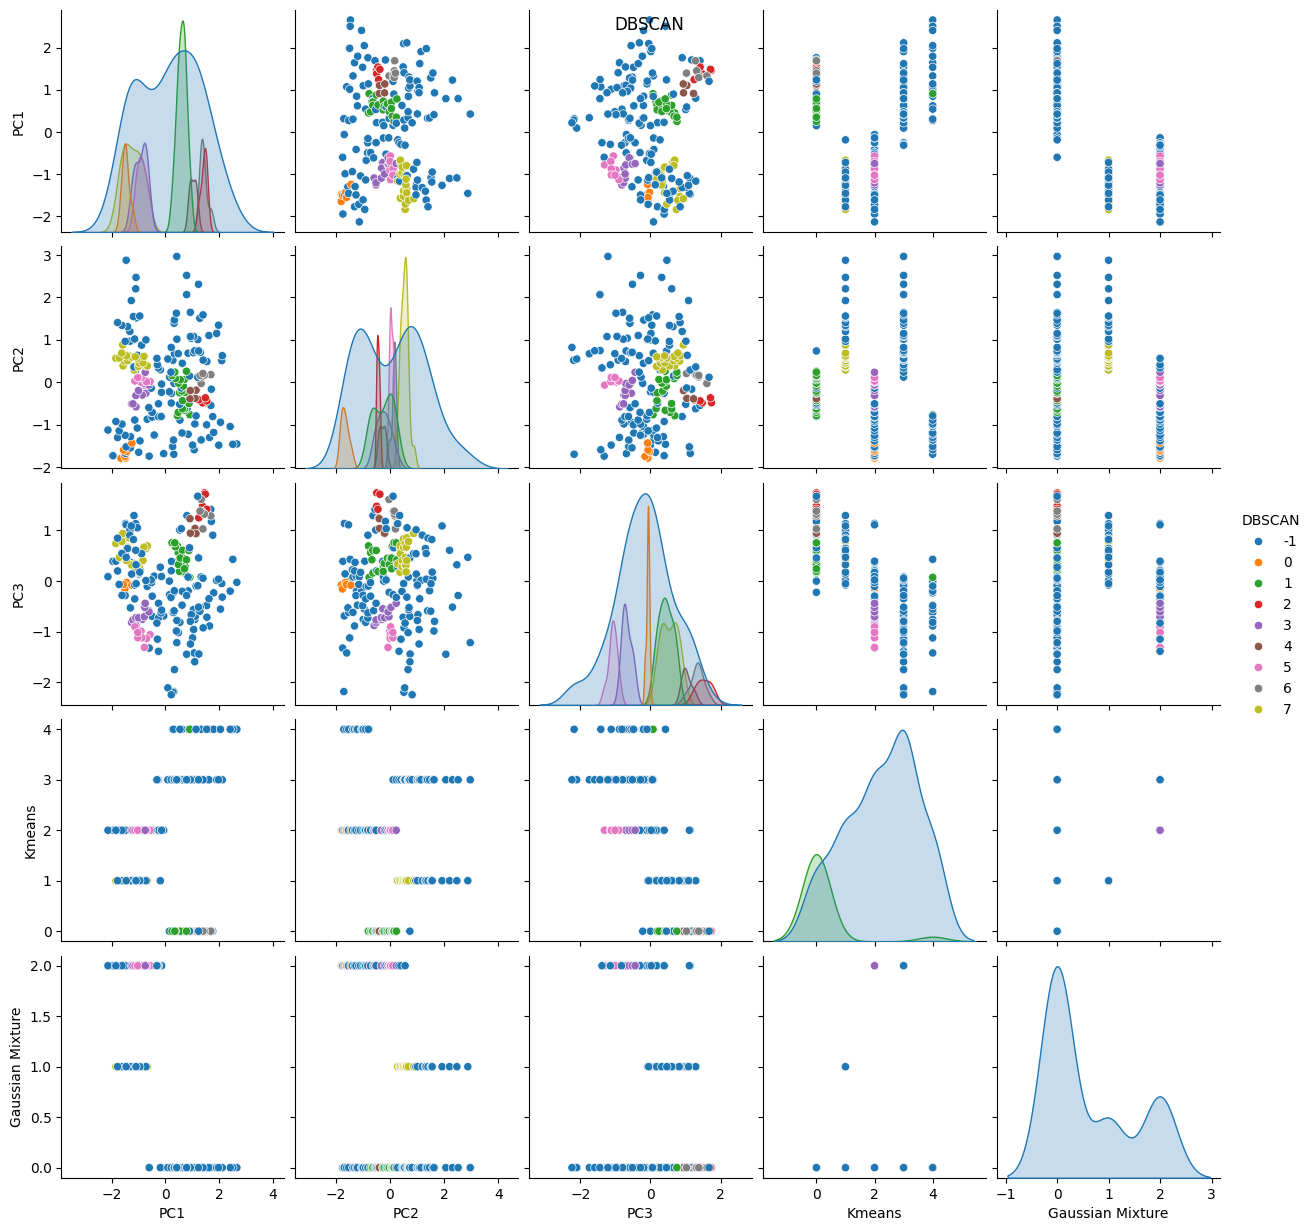

<Figure size 200x1000 with 0 Axes>

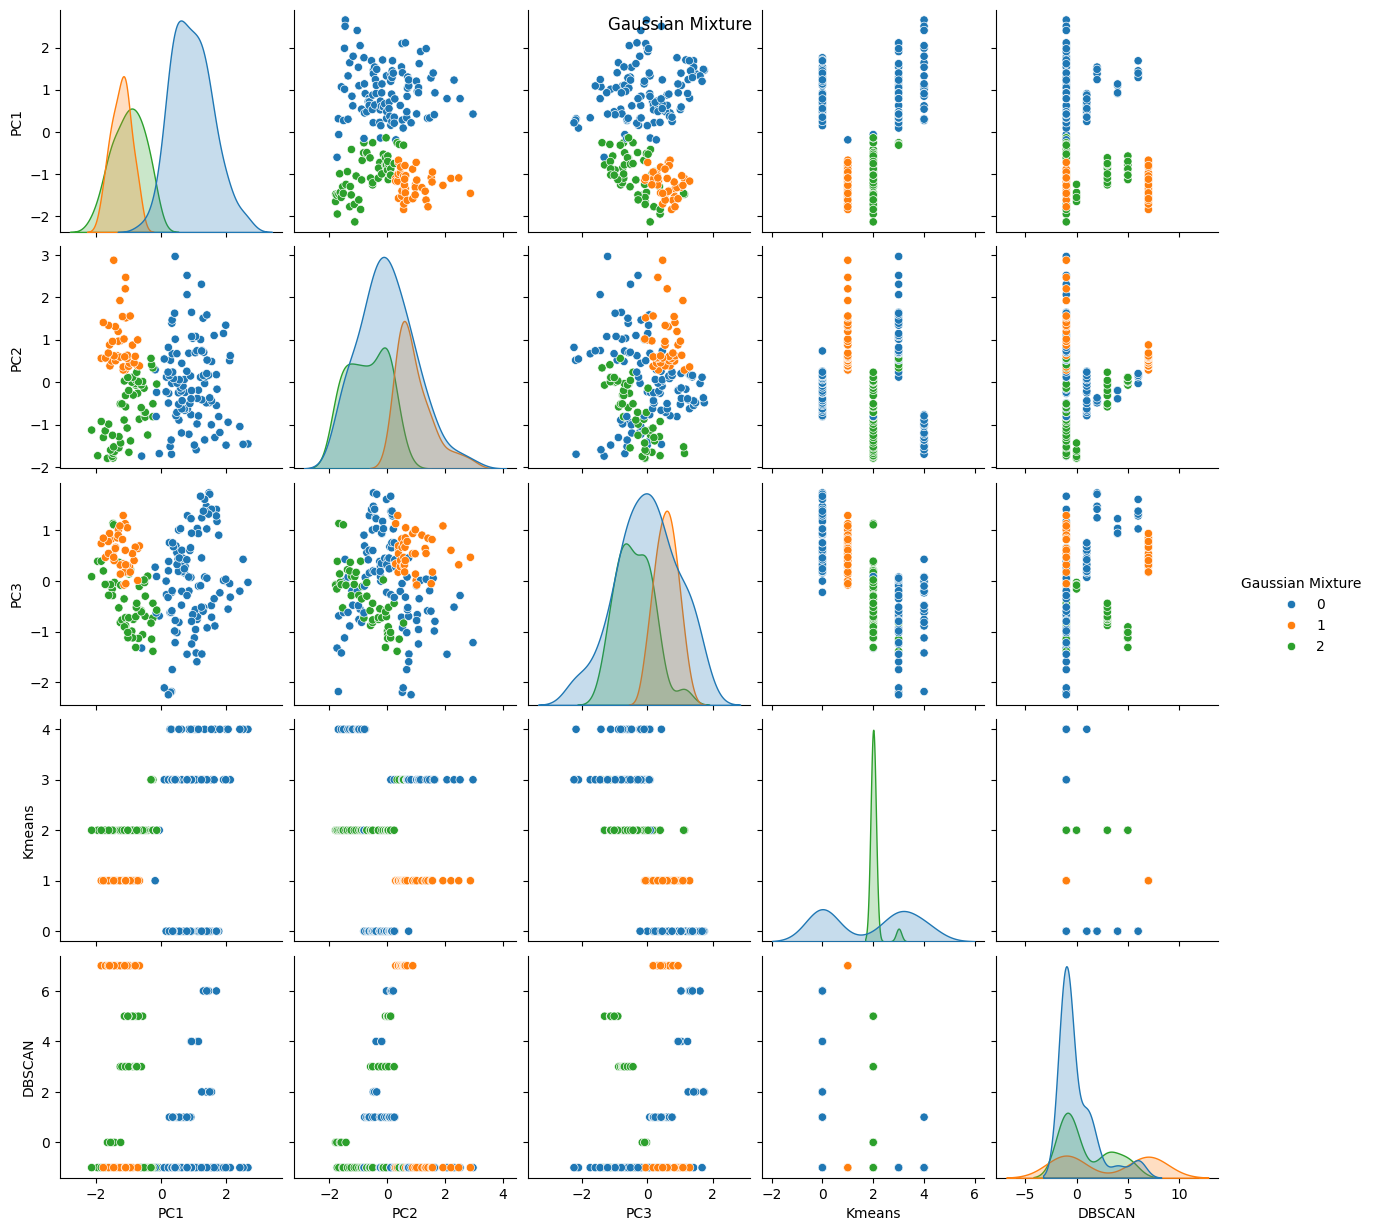

In [6]:
from sklearn.cluster import KMeans,DBSCAN
from sklearn.mixture import GaussianMixture
import seaborn as sns

kmeans=KMeans(n_clusters=5,random_state=42)
kmeans.fit(final_data)
kmeans_labeling=kmeans.labels_

dbscan=DBSCAN(eps=0.3,min_samples=4)
dbscan.fit(final_data)
dbscan_labeling=dbscan.labels_

gm=GaussianMixture(n_components=3,random_state=42)
gm.fit(final_data)
gm_labeling=gm.predict(final_data)

final_df=pd.DataFrame(final_data,columns=["PC1","PC2","PC3"])
final_df["Kmeans"]=kmeans_labeling
final_df["DBSCAN"]=dbscan_labeling
final_df["Gaussian Mixture"]=gm_labeling

plt.figure(figsize=(2,10))
sns.pairplot(final_df,hue="Kmeans",palette="tab10")
plt.suptitle("Kmeans")

plt.figure(figsize=(2,10))
sns.pairplot(final_df,hue="DBSCAN",palette="tab10")
plt.suptitle("DBSCAN")

plt.figure(figsize=(2,10))
sns.pairplot(final_df,hue="Gaussian Mixture",palette="tab10")
plt.suptitle("Gaussian Mixture")

Text(0.5, 0.92, '3rd Ranked - DBSCAN')

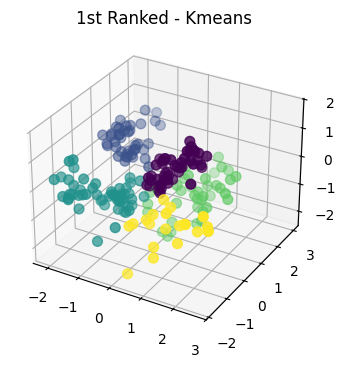

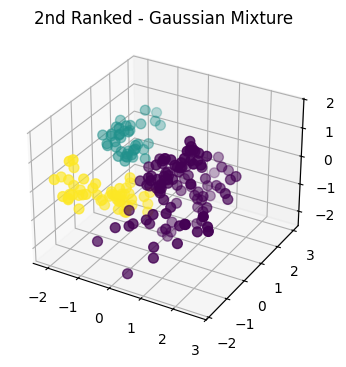

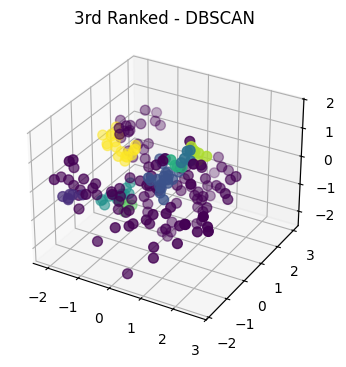

In [7]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(4,4))
ax=fig.add_subplot(111,projection='3d')
scatter=ax.scatter(final_df['PC1'],final_df["PC2"],final_df["PC3"],c=final_df["Kmeans"],s=50)
plt.title("1st Ranked - Kmeans")

fig=plt.figure(figsize=(4,4))
ax=fig.add_subplot(111,projection='3d')
scatter=ax.scatter(final_df['PC1'],final_df["PC2"],final_df["PC3"],c=final_df["Gaussian Mixture"],s=50)
plt.title("2nd Ranked - Gaussian Mixture")

fig=plt.figure(figsize=(4,4))
ax=fig.add_subplot(111,projection='3d')
scatter=ax.scatter(final_df['PC1'],final_df["PC2"],final_df["PC3"],c=final_df["DBSCAN"],s=50)
plt.title("3rd Ranked - DBSCAN")

In [8]:
from sklearn.metrics import silhouette_score
Kmeans_score=silhouette_score(final_data,kmeans_labeling)
DBSCAN_score=silhouette_score(final_data,dbscan_labeling)
Gaussian_Mixture_score=silhouette_score(final_data,gm_labeling)
print("1st. K-means Silhouette Score:            ", Kmeans_score.round(3))
print("2nd. Gaussian Mixture Silhouette Score:   ", Gaussian_Mixture_score.round(3))
print("3rd. DBSCAN Silhouette Score:            ", DBSCAN_score.round(3))

1st. K-means Silhouette Score:             0.416
2nd. Gaussian Mixture Silhouette Score:    0.334
3rd. DBSCAN Silhouette Score:             -0.095


In [9]:
df["Cluster"]=final_df["Kmeans"]
df.groupby("Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,55.638298,54.382979,48.851064
1,32.875000,86.100000,81.525000
2,25.185185,41.092593,62.240741
3,39.871795,86.102564,19.358974
4,46.250000,26.750000,18.350000


Mostly People Tend to spend Much more on Shopping Around the Age of 25(Obv just started earning lol) and Keep on increasing till 35 Until they become mature enough around age 40 to spend very less... This Hits with the reality that life is too short to save money and around the age of 50, they start increasing Spending Budget again XD!(I'm not making it up go check out the code i made for this)